In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
!pip install gdown
import gdown
#this way, anyone can access the files without mounting google driving. Accessing the csv files:
csvFileID = '1GZEf5NV8rX1xbqfaoOp0qrnhzyBQLZ0I'
url = f'https://drive.google.com/uc?id={csvFileID}'
csvOutputFile = 'binary_classification_train.csv'
gdown.download(url, csvOutputFile, quiet=False)

#accessing the module files:
moduleFileID = '1DemTzwacvp2wiKVlkuU9T5Vdw_d48Afh'
url = f'https://drive.google.com/uc?id={moduleFileID}'
moduleOutputFile = 'NeuralNetwork.py'
gdown.download(url, moduleOutputFile, quiet=False)
from NeuralNetwork import NeuralNetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Downloading...
From: https://drive.google.com/uc?id=1GZEf5NV8rX1xbqfaoOp0qrnhzyBQLZ0I
To: /content/binary_classification_train.csv
100%|██████████| 18.6M/18.6M [00:00<00:00, 57.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1DemTzwacvp2wiKVlkuU9T5Vdw_d48Afh
From (redirected): https://drive.google.com/uc?id=1DemTzwacvp2wiKVlkuU9T5Vdw_d48Afh&confirm=t&uuid=3e262a19-be78-4f18-8185-c7d384479f4a
To: /content/NeuralNetwork.py
100%|██████████| 14.5k/14.5k [00:00<00:00, 27.3MB/s]


In [2]:
data = pd.read_csv(csvOutputFile)

In [3]:
data.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
0,1,-36.963099,-15.014703,87.100435,101.523360,82.106571,-10.956180,0.592326,-51.919028,-90.650434,...,-81.183744,13.101921,18.051450,-40.606288,-39.697053,-13.870802,173.722987,-17.349169,-82.550844,0
1,2,-43.715674,18.847116,89.543406,-71.319314,35.597052,126.358570,-29.837495,-40.473764,-94.079238,...,-37.848260,7.457352,-77.420742,53.773718,-100.124294,9.870650,11.592519,-106.123605,-92.796421,1
2,3,-30.737550,-63.729643,106.081332,81.773948,112.769976,-12.425351,-29.913286,-41.771200,16.424511,...,-106.610289,5.930143,-30.177083,-138.969234,-56.054914,-12.790661,164.832498,-37.412902,-85.441150,0
3,4,-27.674757,-118.869495,135.605213,99.130189,50.947548,-63.704785,-7.353057,-58.140229,-80.209027,...,-149.056417,3.893419,-74.100869,-47.659832,-48.209817,-36.264323,59.001922,-59.064134,-78.538639,0
4,5,-28.654141,-77.746597,85.215365,50.374774,79.763207,-32.703048,-28.152031,-63.994794,-153.566789,...,-102.731465,11.160205,-13.395073,9.416237,2.649524,-43.578704,52.261888,-66.081738,-80.325110,0


In [4]:
feature_col = [f"Feature_{i}" for i in range(1,21)]
X = data[feature_col].to_numpy()
Y = data['Class'].to_numpy()
IDs = data['ID'].to_numpy()

Streaming output truncated to the last 5000 lines.
Epoch: 126, Cost: 0.185606, accuracy: 95.0469
Epoch: 127, Cost: 0.186686, accuracy: 95.0469
Epoch: 128, Cost: 0.186175, accuracy: 95.0391
Epoch: 129, Cost: 0.186394, accuracy: 95.0469
Epoch: 130, Cost: 0.187316, accuracy: 95.0417
Epoch: 131, Cost: 0.185357, accuracy: 95.0521
Epoch: 132, Cost: 0.185033, accuracy: 95.0469
Epoch: 133, Cost: 0.186171, accuracy: 95.0312
Epoch: 134, Cost: 0.184859, accuracy: 95.0651
Epoch: 135, Cost: 0.184862, accuracy: 95.0599
Epoch: 136, Cost: 0.184625, accuracy: 95.0573
Epoch: 137, Cost: 0.190410, accuracy: 95.0208
Epoch: 138, Cost: 0.185416, accuracy: 95.0729
Epoch: 139, Cost: 0.185194, accuracy: 95.0781
Epoch: 140, Cost: 0.185592, accuracy: 95.0807
Epoch: 141, Cost: 0.185356, accuracy: 95.0599
Epoch: 142, Cost: 0.184944, accuracy: 95.0547
Epoch: 143, Cost: 0.184902, accuracy: 95.0625
Epoch: 144, Cost: 0.184784, accuracy: 95.0651
Epoch: 145, Cost: 0.183839, accuracy: 95.0755
Epoch: 146, Cost: 0.184968, a

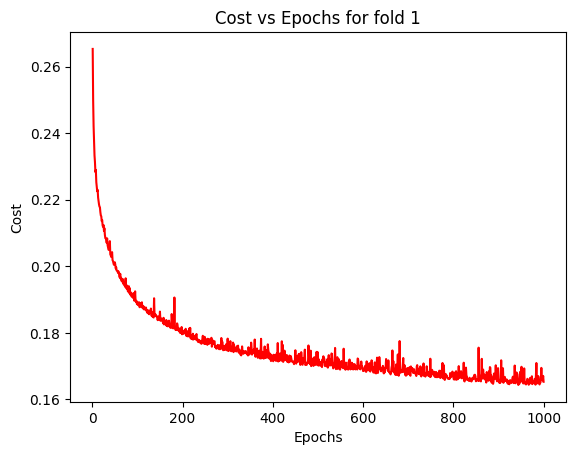

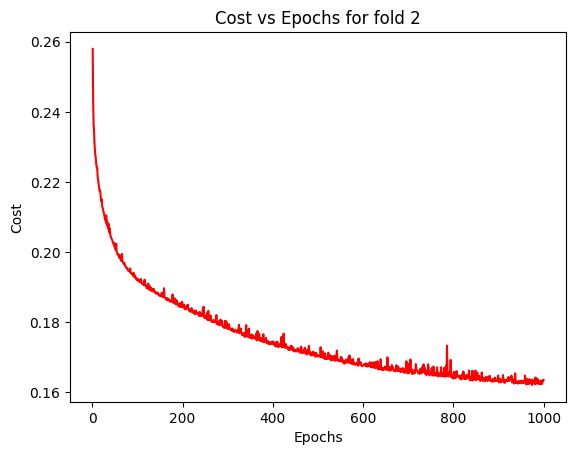

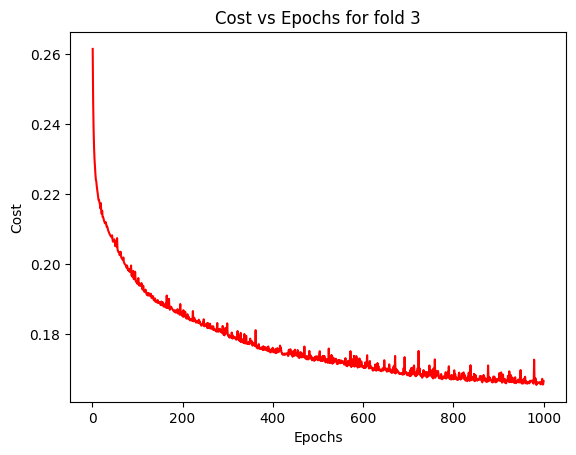

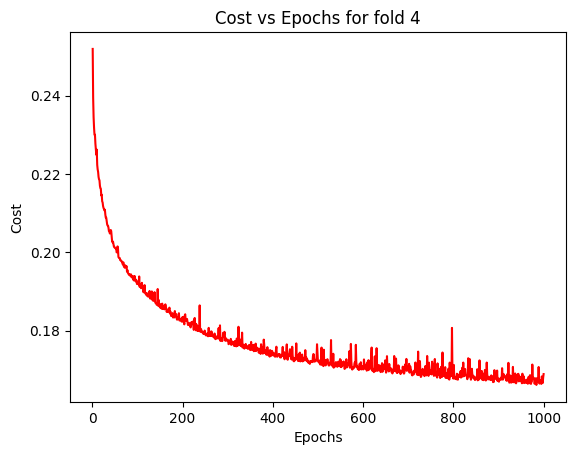

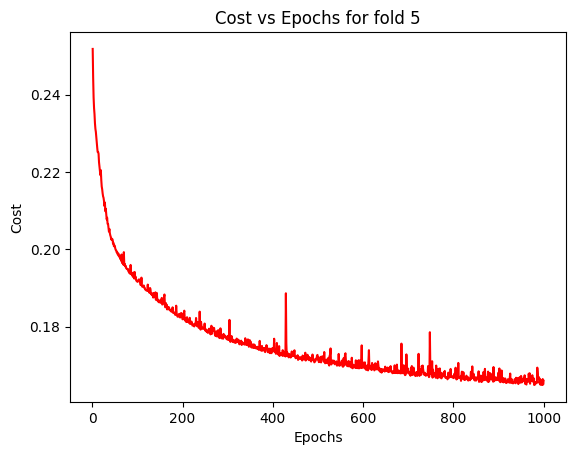

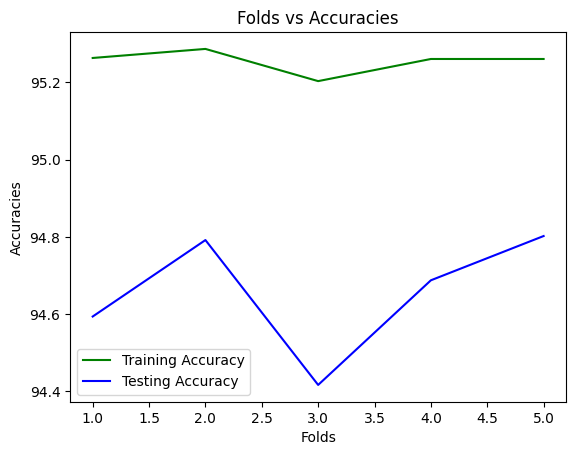

([95.26302083333333,
  95.28645833333333,
  95.203125,
  95.26041666666667,
  95.26041666666667],
 [94.59375, 94.79166666666666, 94.41666666666667, 94.6875, 94.80208333333333],
 95.2546875,
 94.65833333333333)

In [5]:
layers = [20,32,16,2]
act_funcs = ['relu','relu','soft']
model = NeuralNetwork(layers, act_funcs, alpha=1e-2, epochs=1000, reg_param=3e-4)
model.k_fold_cv(X.T, Y,k_folds=5, cost_func='soft',details=False,retrain=False,)

Now, training it on entire X. X must be standardized first

Epoch: 001, Cost: 0.175368, accuracy: 95.1854
Epoch: 002, Cost: 0.176408, accuracy: 95.1479
Epoch: 003, Cost: 0.174427, accuracy: 95.1792
Epoch: 004, Cost: 0.175818, accuracy: 95.2042
Epoch: 005, Cost: 0.174978, accuracy: 95.1542
Epoch: 006, Cost: 0.174018, accuracy: 95.2188
Epoch: 007, Cost: 0.173566, accuracy: 95.2229
Epoch: 008, Cost: 0.174303, accuracy: 95.1917
Epoch: 009, Cost: 0.174594, accuracy: 95.1771
Epoch: 010, Cost: 0.174907, accuracy: 95.1688
Epoch: 011, Cost: 0.173609, accuracy: 95.2229
Epoch: 012, Cost: 0.174338, accuracy: 95.2271
Epoch: 013, Cost: 0.173621, accuracy: 95.2062
Epoch: 014, Cost: 0.173299, accuracy: 95.2188
Epoch: 015, Cost: 0.175152, accuracy: 95.2062
Epoch: 016, Cost: 0.173675, accuracy: 95.2188
Epoch: 017, Cost: 0.173455, accuracy: 95.2083
Epoch: 018, Cost: 0.174496, accuracy: 95.2396
Epoch: 019, Cost: 0.174595, accuracy: 95.2229
Epoch: 020, Cost: 0.176041, accuracy: 95.2229
Epoch: 021, Cost: 0.175418, accuracy: 95.2146
Epoch: 022, Cost: 0.173750, accura

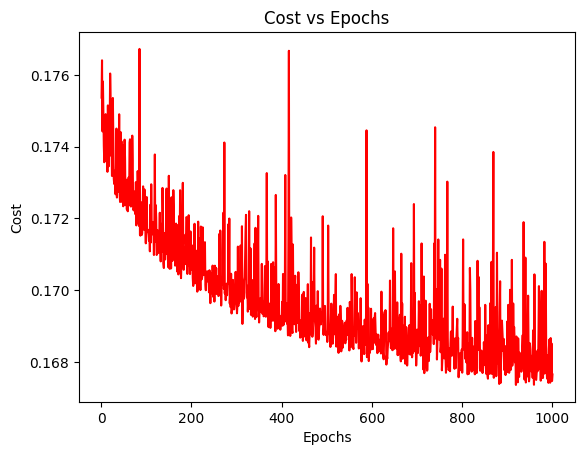

([0.31064868429918696,
  0.14692794297893566,
  0.16960789365066595,
  0.14845168309261897,
  0.1546261678162123,
  0.2350990558055166,
  0.19769020742129034,
  0.039969971121670216,
  0.036917549473671346,
  0.19850740385746513,
  0.060033252305847634,
  0.13138205515118348,
  0.1576858903155439,
  0.052720852643514664,
  0.422866328812319,
  0.2530067784291759,
  0.2725605921286494,
  0.034919408733282045,
  0.023912910471624547,
  0.2717362960446392,
  0.2979638868145448,
  0.09108961446748622,
  0.04251535173769614,
  0.0365021471292285,
  0.06132005253006906,
  0.32729076006329477,
  0.04301284422814142,
  0.25176452239772334,
  0.18204494593697862,
  0.10244617157998213,
  0.3463773528370666,
  0.2246345889463317,
  0.13356141085111284,
  0.2274118362099312,
  0.23059239756282945,
  0.15850304308955343,
  0.1810682451770586,
  0.1325462286022285,
  0.15597068481285242,
  0.12034218367985214,
  0.14460857641037486,
  0.15456691958243005,
  0.5805486496946579,
  0.48458342449167524

In [6]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean)/X_std
model.train(X.T, Y, cost_func='soft', details=False, plot_costs=True)

In [7]:
YFileID = '19Wwiu1CMGuF4p26aDtlVQjb-8b0x3Lpa'
url = f'https://drive.google.com/uc?id={YFileID}'
HiddenData = 'binary_classification_test.csv'
gdown.download(url, HiddenData, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=19Wwiu1CMGuF4p26aDtlVQjb-8b0x3Lpa
To: /content/binary_classification_test.csv
100%|██████████| 4.61M/4.61M [00:00<00:00, 24.9MB/s]


'binary_classification_test.csv'

In [8]:
df = pd.read_csv(HiddenData)

In [9]:
X_data = df[feature_col].to_numpy()
X_data = (X_data - X_mean)/X_std

In [10]:
mapping = []
predictions = model.predict(X_data.T)
for i in range(X_data.shape[0]):
  mapping.append([i+1,predictions[i]])

new_df = pd.DataFrame(mapping, columns=['ID', 'Class'])
new_df.sort_values(by='ID', inplace=True)
print(new_df.head())
new_df.to_csv('binaryMapping.csv', index=False)

   ID  Class
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0
